# Deep Learning

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

## Loading data 

In [3]:
df = pd.read_csv("./processed_data/processed_data/ecg_processed_data.csv", index_col=0)

In [4]:
df.head()

,Record ID,Segment Start,Segment End,0,1,2,3,4,5,6,...,191,192,193,194,195,196,197,198,199,Annotation Class
0,100,13,213,0.059449,0.055308,0.052035,0.049666,0.047961,0.046922,0.046801,...,0.029812,0.031902,0.033233,0.033981,0.034276,0.034166,0.033702,0.033134,0.032648,N
1,100,307,507,0.084239,0.087566,0.088956,0.088621,0.086919,0.084459,0.081823,...,0.020380,0.020170,0.020049,0.020272,0.020719,0.020971,0.020866,0.020622,0.020434,N
2,100,563,763,-0.006937,-0.005690,-0.005184,-0.005172,-0.005405,-0.005802,-0.006385,...,-0.083923,-0.084476,-0.084798,-0.084841,-0.084325,-0.082953,-0.080644,-0.077424,-0.073181,N
3,100,883,1083,0.072086,0.073128,0.073026,0.071802,0.069731,0.067336,0.065156,...,0.040917,0.040820,0.040605,0.040177,0.039328,0.038051,0.036671,0.035565,0.034817,N
4,100,1168,1368,0.084762,0.083995,0.082327,0.080127,0.077701,0.075216,0.072963,...,0.024691,0.025225,0.025977,0.027249,0.029211,0.031715,0.034364,0.036462,0.037443,N


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Record ID,99174.0,170.801752,51.985347,100.000000,114.000000,203.000000,215.000000,234.000000
Segment Start,99174.0,325045.609051,188363.760147,9.000000,160745.000000,326069.500000,488528.500000,649793.000000
Segment End,99174.0,325245.609051,188363.760147,209.000000,160945.000000,326269.500000,488728.500000,649993.000000
0,99174.0,-0.042127,0.119547,-1.900955,-0.097349,-0.045074,0.006416,2.195452
1,99174.0,-0.042054,0.118728,-1.887876,-0.097490,-0.044461,0.006934,2.207827
...,...,...,...,...,...,...,...,...
195,99174.0,0.068449,0.243398,-2.685320,-0.058351,-0.001114,0.128255,2.462435
196,99174.0,0.065637,0.240538,-2.715343,-0.058428,-0.001539,0.122874,2.480217
197,99174.0,0.062668,0.237743,-2.734072,-0.058666,-0.002161,0.117917,2.494743
198,99174.0,0.059560,0.234978,-2.743276,-0.059124,-0.003069,0.112630,2.506468


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99174 entries, 0 to 99173
Columns: 204 entries, Record ID to Annotation Class
dtypes: float64(200), int64(3), object(1)
memory usage: 155.1+ MB


## Preprocessing

In [7]:
X = df[[str(i) for i in range(0, 200)]].values

In [8]:
X

array([[ 0.05944944,  0.05530813,  0.05203533, ...,  0.03370211,
         0.03313351,  0.03264835],
       [ 0.08423915,  0.08756617,  0.08895633, ...,  0.02086591,
         0.02062246,  0.02043396],
       [-0.00693746, -0.00568975, -0.00518379, ..., -0.08064385,
        -0.07742402, -0.07318052],
       ...,
       [-0.0464351 , -0.04455849, -0.04386177, ..., -0.08220224,
        -0.08951841, -0.09635549],
       [-0.09173968, -0.09411179, -0.09693917, ...,  0.01425364,
         0.01084743,  0.0081831 ],
       [ 0.07593816,  0.07788971,  0.07865438, ...,  0.05425404,
         0.04719546,  0.0410799 ]])

In [9]:
X.shape

(99174, 200)

In [10]:
y = df["Annotation Class"].astype("category")

In [11]:
y.describe()

count     99174
unique        5
top           N
freq      73439
Name: Annotation Class, dtype: object

In [12]:
y.info()

<class 'pandas.core.series.Series'>
Index: 99174 entries, 0 to 99173
Series name: Annotation Class
Non-Null Count  Dtype   
--------------  -----   
99174 non-null  category
dtypes: category(1)
memory usage: 871.9 KB


In [13]:
y.cat.codes

0        2
1        2
2        2
3        2
4        2
        ..
99169    2
99170    2
99171    2
99172    2
99173    2
Length: 99174, dtype: int8

In [14]:
y.cat.categories

Index(['/', 'L', 'N', 'R', 'V'], dtype='object')

In [15]:
y_code = y.cat.codes.values

In [16]:
y_code

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [17]:
y_code.shape

(99174,)

In [18]:
y_code

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_code, test_size=0.2, random_state=101, stratify=y, shuffle=True
)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=101, stratify=y_train, shuffle=True
)

In [22]:
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_val_tensor = torch.LongTensor(y_val)
y_test_tensor = torch.LongTensor(y_test)

In [23]:
X_train_tensor.shape

torch.Size([63471, 200])

In [24]:
X_val_tensor.shape

torch.Size([15868, 200])

## ANN

In [25]:
from ecg_deep_learning_models.models import ECGANNModel, ECGCNNModel, ECGLSTMModel
from ecg_deep_learning_models.utils import (
    count_parameters,
    train_model,
    eval_model,
    show_metrics,profile
)

In [26]:
ecg_ann_model = ECGANNModel(layers=[100, 50])
ecg_ann_model_1 = ECGANNModel(layers=[100, 50, 25])

In [27]:
count_parameters(ecg_ann_model)

 20000
   100
  5000
    50
   250
     5
______
 25405


In [28]:
count_parameters(ecg_ann_model_1)

 20000
   100
  5000
    50
  1250
    25
   125
     5
______
 26555


In [29]:
ecg_ann_model

ECGANNModel(
  (layers): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=50, out_features=5, bias=True)
  )
)

In [30]:
ecg_ann_model_1

ECGANNModel(
  (layers): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=25, out_features=5, bias=True)
  )
)

In [31]:
X_train_tensor.shape

torch.Size([63471, 200])

In [32]:
ecg_ann_model.parameters()

<generator object Module.parameters at 0x7f2b4abd34a0>

In [33]:
ecg_ann_model_1.parameters()

<generator object Module.parameters at 0x7f2b4abd3820>

In [34]:
ecg_ann_model.parameters

<bound method Module.parameters of ECGANNModel(
  (layers): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=50, out_features=5, bias=True)
  )
)>

In [35]:
ecg_ann_model_1.parameters

<bound method Module.parameters of ECGANNModel(
  (layers): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=25, out_features=5, bias=True)
  )
)>

In [36]:
train_accuracies, test_accuracies, train_mean_losses, test_mean_losses = train_model(
    model=ecg_ann_model,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_test=X_val_tensor,
    y_test=y_val_tensor,
    learning_rate=0.001,
    batch_size=100,
    val_batch_size=100,
    epochs=100,
)

epoch:1	Train Loss:        0.45	Train Accuracy:       86.30	Test Loss:        0.18	Test Accuracy:       94.93	 Tolerance Count:0
epoch:2	Train Loss:        0.23	Train Accuracy:       93.15	Test Loss:        0.12	Test Accuracy:       96.43	 Tolerance Count:0
epoch:3	Train Loss:        0.19	Train Accuracy:       94.37	Test Loss:        0.10	Test Accuracy:       97.42	 Tolerance Count:0
epoch:4	Train Loss:        0.17	Train Accuracy:       95.12	Test Loss:        0.09	Test Accuracy:       97.59	 Tolerance Count:0
epoch:5	Train Loss:        0.15	Train Accuracy:       95.65	Test Loss:        0.08	Test Accuracy:       97.72	 Tolerance Count:0
epoch:6	Train Loss:        0.15	Train Accuracy:       95.82	Test Loss:        0.07	Test Accuracy:       98.02	 Tolerance Count:0
epoch:7	Train Loss:        0.14	Train Accuracy:       96.08	Test Loss:        0.07	Test Accuracy:       98.13	 Tolerance Count:0
epoch:8	Train Loss:        0.13	Train Accuracy:       96.30	Test Loss:        0.07	Test Accuracy:

epoch:65	Train Loss:        0.08	Train Accuracy:       97.73	Test Loss:        0.04	Test Accuracy:       98.84	 Tolerance Count:0
epoch:66	Train Loss:        0.08	Train Accuracy:       97.77	Test Loss:        0.04	Test Accuracy:       98.88	 Tolerance Count:0
epoch:67	Train Loss:        0.08	Train Accuracy:       97.81	Test Loss:        0.04	Test Accuracy:       98.92	 Tolerance Count:0
epoch:68	Train Loss:        0.08	Train Accuracy:       97.67	Test Loss:        0.04	Test Accuracy:       98.96	 Tolerance Count:0
epoch:69	Train Loss:        0.08	Train Accuracy:       97.74	Test Loss:        0.04	Test Accuracy:       98.93	 Tolerance Count:0
epoch:70	Train Loss:        0.08	Train Accuracy:       97.65	Test Loss:        0.04	Test Accuracy:       98.87	 Tolerance Count:0
epoch:71	Train Loss:        0.08	Train Accuracy:       97.74	Test Loss:        0.04	Test Accuracy:       98.91	 Tolerance Count:0
epoch:72	Train Loss:        0.08	Train Accuracy:       97.75	Test Loss:        0.04	Test A

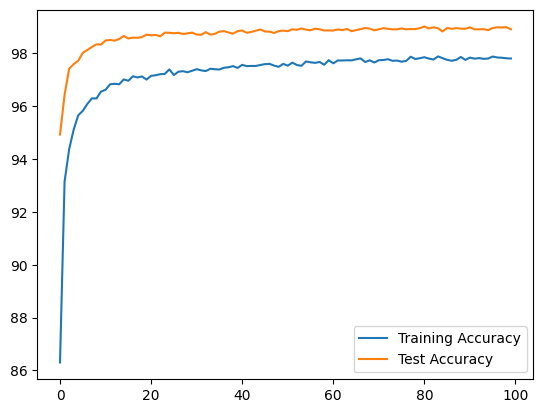

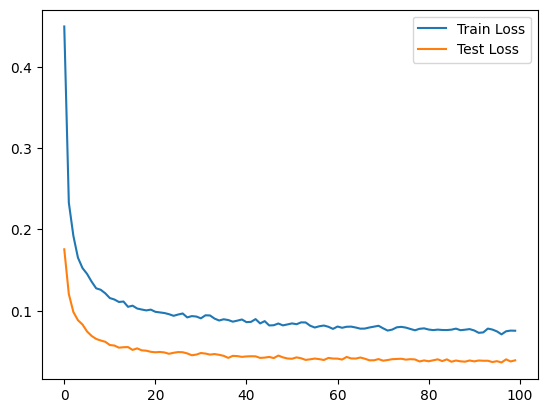

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       0.98      0.99      0.98      1594
           2       1.00      0.99      0.99     14734
           3       0.99      1.00      0.99      1442
           4       0.95      0.96      0.96      1341

    accuracy                           0.99     19835
   macro avg       0.98      0.99      0.98     19835
weighted avg       0.99      0.99      0.99     19835

[[  723     0     0     0     1]
 [    0  1575    12     0     7]
 [    0    23 14637    14    60]
 [    0     0     5  1436     1]
 [    1    16    34     1  1289]]

Duration: 1 seconds
ECGANNModel(
  25.41 k, 100.000% Params, 25.55 KMac, 100.000% MACs, 
  (layers): Sequential(
    25.41 k, 100.000% Params, 25.55 KMac, 100.000% MACs, 
    (0): Linear(20.1 k, 79.118% Params, 20.1 KMac, 78.654% MACs, in_features=200, out_features=100, bias=True)
    (1): ReLU(0, 0.000% Params, 100.0 Mac, 0.391% MACs, inplac

In [38]:
show_metrics(train_accuracies, test_accuracies, train_mean_losses, test_mean_losses)
eval_model(ecg_ann_model, X_test_tensor, y_test_tensor)
profile(ecg_ann_model,tuple([200]))

In [39]:
train_accuracies, test_accuracies, train_mean_losses, test_mean_losses = train_model(
    model=ecg_ann_model_1,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_test=X_val_tensor,
    y_test=y_val_tensor,
    learning_rate=0.001,
    batch_size=100,
    val_batch_size=100,
    epochs=100,
)

epoch:1	Train Loss:        0.58	Train Accuracy:       80.00	Test Loss:        0.24	Test Accuracy:       93.06	 Tolerance Count:0
epoch:2	Train Loss:        0.32	Train Accuracy:       89.26	Test Loss:        0.16	Test Accuracy:       95.75	 Tolerance Count:0
epoch:3	Train Loss:        0.27	Train Accuracy:       91.75	Test Loss:        0.13	Test Accuracy:       96.30	 Tolerance Count:0
epoch:4	Train Loss:        0.24	Train Accuracy:       92.80	Test Loss:        0.11	Test Accuracy:       96.80	 Tolerance Count:0
epoch:5	Train Loss:        0.22	Train Accuracy:       93.53	Test Loss:        0.10	Test Accuracy:       97.18	 Tolerance Count:0
epoch:6	Train Loss:        0.21	Train Accuracy:       93.87	Test Loss:        0.09	Test Accuracy:       97.32	 Tolerance Count:0
epoch:7	Train Loss:        0.20	Train Accuracy:       94.32	Test Loss:        0.09	Test Accuracy:       97.52	 Tolerance Count:0
epoch:8	Train Loss:        0.18	Train Accuracy:       94.61	Test Loss:        0.08	Test Accuracy:

epoch:65	Train Loss:        0.11	Train Accuracy:       97.18	Test Loss:        0.04	Test Accuracy:       98.77	 Tolerance Count:0
epoch:66	Train Loss:        0.11	Train Accuracy:       97.13	Test Loss:        0.05	Test Accuracy:       98.80	 Tolerance Count:0
epoch:67	Train Loss:        0.11	Train Accuracy:       97.21	Test Loss:        0.04	Test Accuracy:       98.81	 Tolerance Count:0
epoch:68	Train Loss:        0.11	Train Accuracy:       97.06	Test Loss:        0.04	Test Accuracy:       98.85	 Tolerance Count:0
epoch:69	Train Loss:        0.11	Train Accuracy:       97.15	Test Loss:        0.04	Test Accuracy:       98.84	 Tolerance Count:0
epoch:70	Train Loss:        0.11	Train Accuracy:       97.15	Test Loss:        0.04	Test Accuracy:       98.77	 Tolerance Count:0
epoch:71	Train Loss:        0.10	Train Accuracy:       97.17	Test Loss:        0.04	Test Accuracy:       98.78	 Tolerance Count:0
epoch:72	Train Loss:        0.11	Train Accuracy:       97.10	Test Loss:        0.04	Test A

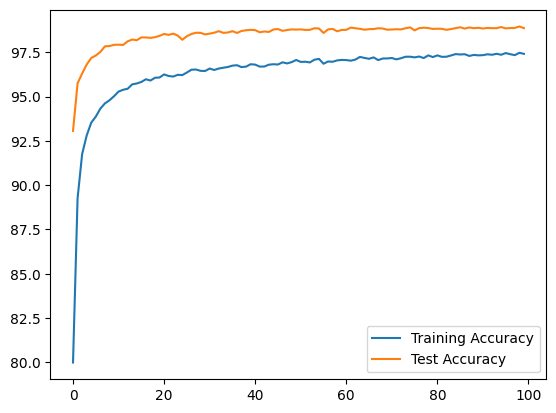

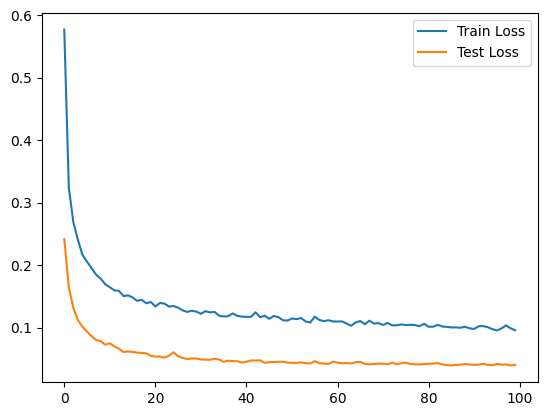

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       717
           1       0.97      0.99      0.98      1582
           2       0.99      0.99      0.99     14689
           3       0.99      1.00      0.99      1436
           4       0.96      0.93      0.94      1411

    accuracy                           0.99     19835
   macro avg       0.98      0.98      0.98     19835
weighted avg       0.99      0.99      0.99     19835

[[  716     0     1     0     0]
 [    0  1567    12     0     3]
 [    1    19 14610    12    47]
 [    0     0     4  1430     2]
 [    7    28    61     9  1306]]

Duration: 1 seconds
ECGANNModel(
  26.55 k, 100.000% Params, 26.73 KMac, 100.000% MACs, 
  (layers): Sequential(
    26.55 k, 100.000% Params, 26.73 KMac, 100.000% MACs, 
    (0): Linear(20.1 k, 75.692% Params, 20.1 KMac, 75.196% MACs, in_features=200, out_features=100, bias=True)
    (1): ReLU(0, 0.000% Params, 100.0 Mac, 0.374% MACs, inplac

In [40]:
show_metrics(train_accuracies, test_accuracies, train_mean_losses, test_mean_losses)
eval_model(ecg_ann_model_1, X_test_tensor, y_test_tensor)
profile(ecg_ann_model_1,tuple([200]))

## CNN

In [41]:
ecg_cnn_model = ECGCNNModel()

In [42]:
count_parameters(ecg_cnn_model)

    48
    16
  1536
    32
    32
    32
  6144
    64
 24576
   128
   128
   128
2432000
   100
  5000
    50
   250
     5
______
2470269


In [43]:
train_accuracies, test_accuracies, train_mean_losses, test_mean_losses = train_model(
    model=ecg_cnn_model,
    X_train=X_train_tensor.reshape(-1, 1, 200),
    y_train=y_train_tensor,
    X_test=X_val_tensor.reshape(-1, 1, 200),
    y_test=y_val_tensor,
    learning_rate=0.001,
    batch_size=100,
    val_batch_size=100,
    epochs=6,
)

epoch:1	Train Loss:        0.21	Train Accuracy:       93.59	Test Loss:        0.05	Test Accuracy:       98.61	 Tolerance Count:0
epoch:2	Train Loss:        0.08	Train Accuracy:       97.69	Test Loss:        0.05	Test Accuracy:       98.76	 Tolerance Count:0
epoch:3	Train Loss:        0.06	Train Accuracy:       98.28	Test Loss:        0.05	Test Accuracy:       99.06	 Tolerance Count:0
epoch:4	Train Loss:        0.05	Train Accuracy:       98.61	Test Loss:        0.04	Test Accuracy:       99.20	 Tolerance Count:0
epoch:5	Train Loss:        0.05	Train Accuracy:       98.71	Test Loss:        0.03	Test Accuracy:       99.22	 Tolerance Count:0
epoch:6	Train Loss:        0.04	Train Accuracy:       98.90	Test Loss:        0.03	Test Accuracy:       99.22	 Tolerance Count:0

Duration: 840 seconds


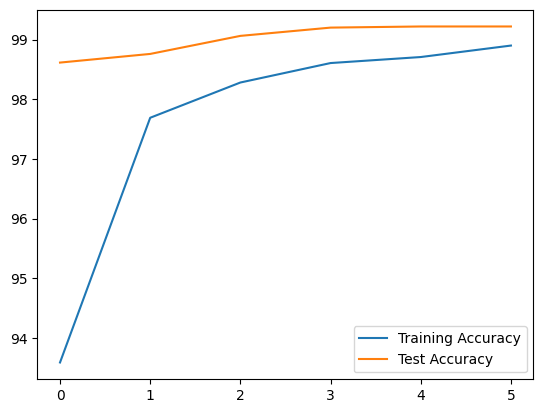

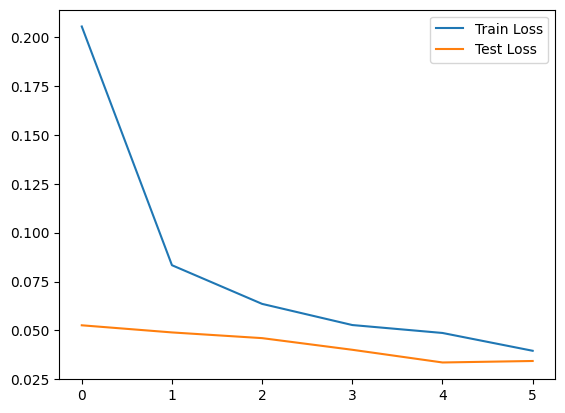

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       0.99      0.99      0.99      1616
           2       1.00      0.99      1.00     14746
           3       1.00      1.00      1.00      1450
           4       0.94      0.98      0.96      1298

    accuracy                           0.99     19835
   macro avg       0.98      0.99      0.99     19835
weighted avg       0.99      0.99      0.99     19835

[[  723     0     2     0     0]
 [    0  1594     5     0    17]
 [    0    10 14659     7    70]
 [    0     0     5  1444     1]
 [    1    10    17     0  1270]]

Duration: 12 seconds
ECGCNNModel(
  2.47 M, 100.000% Params, 8.81 MMac, 100.000% MACs, 
  (conv_layer): Sequential(
    32.86 k, 1.330% Params, 6.37 MMac, 72.339% MACs, 
    (0): Conv1d(64, 0.003% Params, 12.67 KMac, 0.144% MACs, 1, 16, kernel_size=(3,), stride=(1,))
    (1): ReLU(0, 0.000% Params, 3.17 KMac, 0.036% MACs, inplace=True)
    (2

In [46]:
show_metrics(train_accuracies, test_accuracies, train_mean_losses, test_mean_losses)
eval_model(ecg_cnn_model, X_test_tensor.reshape(-1, 1, 200), y_test_tensor)
profile(ecg_cnn_model, tuple([1,200]))

## LSTM

In [47]:
ecg_lstm_model = ECGLSTMModel()

In [48]:
ecg_lstm_model.parameters()

<generator object Module.parameters at 0x7f2b2e99b890>

In [49]:
ecg_lstm_model.parameters

<bound method Module.parameters of ECGLSTMModel(
  (lstm): LSTM(200, 50, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=50, out_features=25, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=25, out_features=5, bias=True)
  )
)>

In [50]:
count_parameters(ecg_lstm_model)

 40000
 10000
   200
   200
 10000
 10000
   200
   200
  1250
    25
   125
     5
______
 72205


In [51]:
train_accuracies, test_accuracies, train_mean_losses, test_mean_losses = train_model(
    model=ecg_lstm_model,
    X_train=X_train_tensor.reshape(-1,1,200),
    y_train=y_train_tensor,
    X_test=X_val_tensor.reshape(-1,1,200),
    y_test=y_val_tensor,
    learning_rate=0.001,
    batch_size=100,
    val_batch_size=100,
    epochs=10, lstm=True
)

epoch:1	Train Loss:        0.48	Train Accuracy:       81.91	Test Loss:        0.15	Test Accuracy:       95.36	 Tolerance Count:0
epoch:2	Train Loss:        0.15	Train Accuracy:       95.65	Test Loss:        0.08	Test Accuracy:       97.91	 Tolerance Count:0
epoch:3	Train Loss:        0.10	Train Accuracy:       97.48	Test Loss:        0.06	Test Accuracy:       98.51	 Tolerance Count:0
epoch:4	Train Loss:        0.08	Train Accuracy:       98.01	Test Loss:        0.05	Test Accuracy:       98.68	 Tolerance Count:0
epoch:5	Train Loss:        0.07	Train Accuracy:       98.34	Test Loss:        0.05	Test Accuracy:       98.83	 Tolerance Count:0
epoch:6	Train Loss:        0.06	Train Accuracy:       98.52	Test Loss:        0.05	Test Accuracy:       98.93	 Tolerance Count:0
epoch:7	Train Loss:        0.05	Train Accuracy:       98.66	Test Loss:        0.04	Test Accuracy:       98.95	 Tolerance Count:0
epoch:8	Train Loss:        0.05	Train Accuracy:       98.74	Test Loss:        0.04	Test Accuracy:

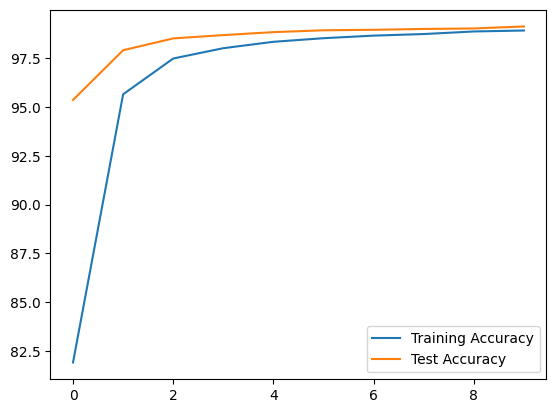

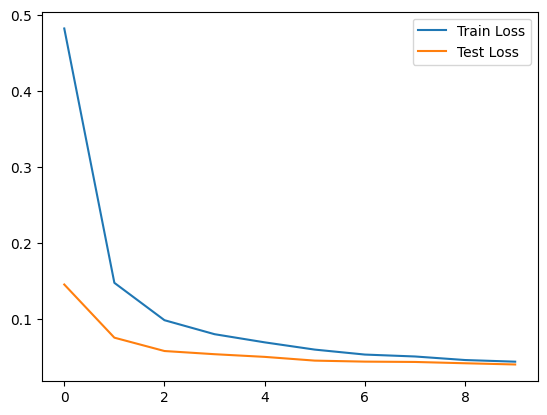

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       724
           1       0.98      0.98      0.98      1627
           2       1.00      0.99      1.00     14714
           3       0.99      0.99      0.99      1454
           4       0.94      0.97      0.96      1316

    accuracy                           0.99     19835
   macro avg       0.98      0.99      0.98     19835
weighted avg       0.99      0.99      0.99     19835

[[  723     0     1     0     0]
 [    0  1587    19     0    21]
 [    0    12 14637     9    56]
 [    0     0    13  1438     3]
 [    1    15    18     4  1278]]

Duration: 1 seconds
ECGLSTMModel(
  72.2 k, 100.000% Params, 73.23 KMac, 100.000% MACs, 
  (lstm): LSTM(70.8 k, 98.054% Params, 71.8 KMac, 98.047% MACs, 200, 50, num_layers=2, batch_first=True)
  (fc): Sequential(
    1.41 k, 1.946% Params, 1.43 KMac, 1.953% MACs, 
    (0): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=

In [52]:
show_metrics(train_accuracies, test_accuracies, train_mean_losses, test_mean_losses)
eval_model(ecg_lstm_model, X_test_tensor.reshape(-1, 1, 200), y_test_tensor)
profile(ecg_lstm_model,tuple([ 1, 200]))